In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train_df = pd.read_csv("train_10000.txt", header=None)
test_df = pd.read_csv("test_10000.txt", header=None)

train_df.columns = test_df.columns = ["label", "url"]
print(len(train_df), len(test_df))

49850 2624


In [3]:
# build own tokenizer and vocab
from utils import get_word_vocab, get_words
x, word_reverse_dict = get_word_vocab(train_df.url.values, 200)
word_dict = {word_reverse_dict[key]:key for key in word_reverse_dict}
word_x = get_words(x, word_reverse_dict, 1, train_df.url.values)
def tokenizer(x):
    return get_words([x], word_reverse_dict, 1, train_df.url.values)[0]

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Finished build vocabulary and mapping to x in 2.670419692993164
Size of word vocabulary: 70637


# Words

In [4]:
traincorpus = []
testcorpus = []
vectorizer = TfidfVectorizer(analyzer="word", encoding="utf-8", decode_error="ignore", lowercase=False, use_idf=True)
# vectorizer = TfidfVectorizer(analyzer="char", encoding="utf-8", tokenizer=tokenizer, vocabulary=word_dict, \
#                              decode_error="ignore", lowercase=False, use_idf=True)

for i in train_df.url.values:
    traincorpus.append(i)
for i in test_df.url.values:
    testcorpus.append(i)

X_train = vectorizer.fit_transform(traincorpus)
X_test = vectorizer.transform(testcorpus)
print(X_train.shape, X_test.shape)

(49850, 82610) (2624, 82610)


In [5]:
list(vectorizer.vocabulary_.keys())[:10]

['1010',
 '483',
 '3Dcm_lego',
 'uu',
 '4hat',
 '32d4c2e3c33be5c48cbef460dd975122b34fc643',
 'casefile',
 'joseph',
 'jumbotron',
 'dd673c1ee9429f80f48dc93cae8706d9']

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, train_df.label.values)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# word
model.score(X_train, train_df.label.values), model.score(X_test, test_df.label.values)

(0.9995386158475427, 0.9725609756097561)

In [8]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [9]:
roc_auc_score(train_pred, train_df.label.values), roc_auc_score(test_pred, test_df.label.values)

(0.9995387967653881, 0.97383382263852)

# Char

In [10]:
traincorpus = []
testcorpus = []
vectorizer = TfidfVectorizer(analyzer="char", encoding="utf-8", decode_error="ignore", lowercase=False, use_idf=True)

for i in train_df.url.values:
    traincorpus.append(i)
for i in test_df.url.values:
    testcorpus.append(i)

X_train = vectorizer.fit_transform(traincorpus)
X_test = vectorizer.transform(testcorpus)
print(X_train.shape, X_test.shape)

(49850, 129) (2624, 129)


In [11]:
list(vectorizer.vocabulary_.keys())[:10]

['c', 'f', 'Â', ';', 'И', 'd', '(', 'K', 'u', '\x80']

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, train_df.label.values)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
#char
model.score(X_train, train_df.label.values), model.score(X_test, test_df.label.values)

(0.9992978936810432, 0.9782774390243902)

In [14]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [15]:
roc_auc_score(train_pred, train_df.label.values), roc_auc_score(test_pred, test_df.label.values)

(0.9992979587800668, 0.978357751495449)

# Shap

In [44]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [27]:
# example dataset -> DataFrame
X,y = shap.datasets.boston()
print(X.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [28]:
target = X_train[:100]
X = {}
for token in vectorizer.vocabulary_:
    idx = vectorizer.vocabulary_[token]
    X[token] = target[:, idx].toarray().flatten()
X = pd.DataFrame(X)

In [29]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [61]:
# visualize the first prediction's malicious explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0,:])

In [63]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

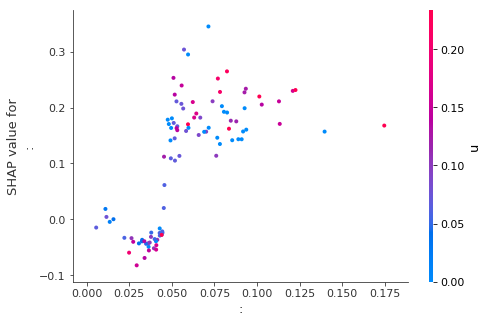

In [65]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot(":", shap_values[0], X)

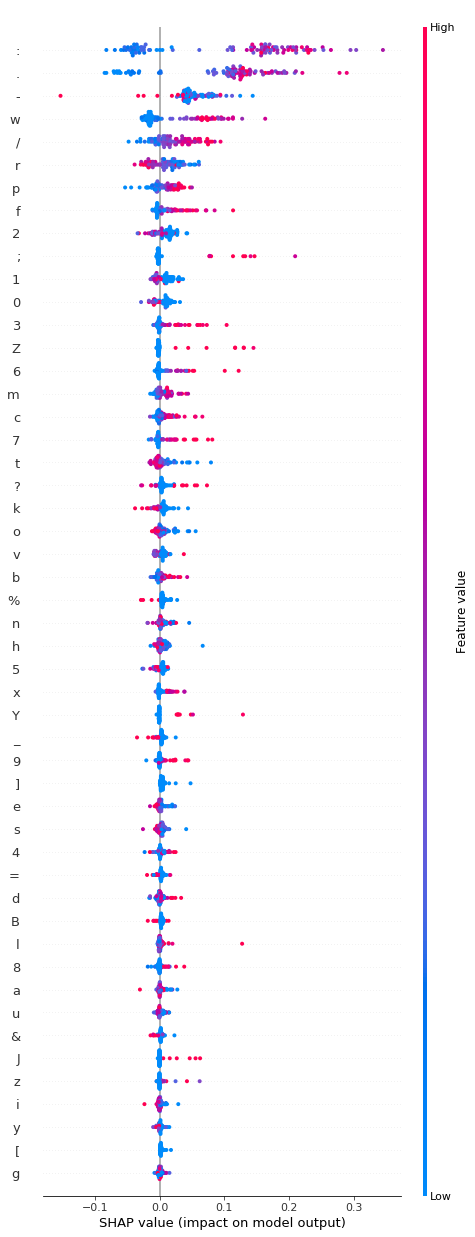

In [68]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], X, max_display=15)

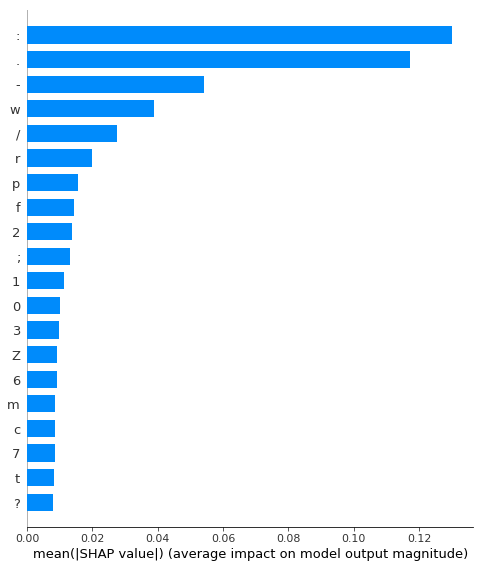

In [70]:
shap.summary_plot(shap_values[0], X, plot_type="bar")

# deep